In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from data_preprocessing_final import initiate_data

In [25]:
data = pd.read_csv('Ames_HousePrice.csv', index_col=0)

In [26]:
train_data_linear, train_target_linear, test_data_linear, test_target_linear, train_data_tree, train_target_tree, test_data_tree, test_target_tree = initiate_data(data)

In [27]:
train_data_tree = train_data_tree.drop('PID', axis = 1)
test_data_tree = test_data_tree.drop('PID', axis = 1)
train_data_tree

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Bsmt_Unfin_Ratio,TotalLivArea
0,5.0,0.0,2.0,1.0,2.0,4.0,2.0,0.0,5.0,2.0,...,0.000000,0.626087,0.361559,0.341292,0.000000,0.000000,0.0,0.390625,0.000000,0.350875
1,5.0,0.0,3.0,0.0,0.0,15.0,2.0,0.0,2.0,1.0,...,0.000000,0.547826,0.209677,0.275983,0.063158,0.000000,0.0,0.000000,0.305493,0.284088
2,5.0,1.0,3.0,4.0,0.0,22.0,5.0,0.0,2.0,0.0,...,0.333333,0.678261,0.225806,0.292135,0.252632,0.000000,0.0,0.000000,0.250559,0.163288
3,5.0,0.0,3.0,4.0,0.0,22.0,2.0,0.0,2.0,0.0,...,0.333333,0.634783,0.295699,0.000000,0.168421,0.177866,0.0,0.000000,0.609856,0.356845
4,5.0,0.0,3.0,1.0,0.0,19.0,2.0,0.0,2.0,1.0,...,0.333333,0.973913,0.788978,0.134831,0.052632,0.000000,0.0,0.000000,0.274138,0.555124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,5.0,1.0,3.0,4.0,0.0,15.0,2.0,0.0,0.0,0.0,...,0.000000,0.452174,0.225806,0.110955,0.000000,0.100791,0.0,0.000000,0.468750,0.199389
2056,5.0,0.0,3.0,1.0,0.0,22.0,5.0,0.0,5.0,0.0,...,0.000000,0.704348,0.319220,0.000000,0.077193,0.000000,0.0,0.000000,0.264828,0.221050
2057,5.0,0.0,3.0,4.0,0.0,7.0,2.0,0.0,0.0,0.0,...,0.000000,0.521739,0.201613,0.084972,0.000000,0.000000,0.0,0.460069,1.000000,0.221744
2058,6.0,1.0,3.0,4.0,0.0,3.0,2.0,0.0,0.0,0.0,...,0.333333,0.304348,0.322581,0.000000,0.017544,0.000000,0.0,0.000000,0.517241,0.257151


In [28]:
train_target_tree = np.exp(train_target_tree)
test_target_tree = np.exp(test_target_tree)
test_target_tree

0       98000.0
1      342000.0
2      133700.0
3       98000.0
4      171000.0
         ...   
510    195000.0
511    128000.0
512    218836.0
513     97900.0
514    196000.0
Name: SalePrice, Length: 515, dtype: float64

In [29]:
gbm = GradientBoostingRegressor()
gbm.fit(train_data_tree, train_target_tree)
gbm.score(test_data_tree, test_target_tree)

0.9259230405302022

In [30]:
gbm = GradientBoostingRegressor(n_estimators = 1000)
gbm.fit(train_data_tree, train_target_tree)
gbm.score(test_data_tree, test_target_tree)

0.9308077599542132

In [8]:
gbm = GradientBoostingRegressor(n_estimators = 1000, max_depth = 2)
gbm.fit(train_data_tree, train_target_tree)
gbm.score(test_data_tree, test_target_tree)

0.897318174642158

In [31]:
abm = AdaBoostRegressor(n_estimators = 43)
abm.fit(train_data_tree, train_target_tree)
abm.score(test_data_tree, test_target_tree)

0.8544446130865638

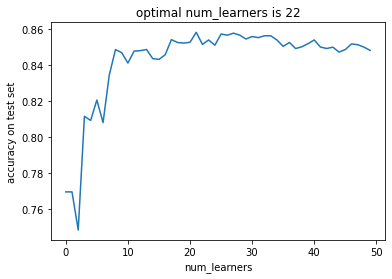

In [32]:
test_accs = []
for num_learners in range(1,51):
    # Train a boosting model on the dataset
    abm = AdaBoostRegressor(n_estimators=num_learners,random_state=0)
    abm.fit(train_data_tree, train_target_tree)

    # Calculate the accuracy on the test set
    test_accs.append(abm.score(test_data_tree, test_target_tree))

plt.plot(test_accs)
plt.xlabel('num_learners')
plt.ylabel('accuracy on test set')
opt_num_learners = range(1,51)[np.argmax(test_accs)]
plt.title('optimal num_learners is {}'.format(opt_num_learners))
plt.show()

In [33]:
params = {'learning_rate':[.05, .01, .001],'max_depth':[1,2,3]}

gbm = GradientBoostingRegressor()
grid_search = GridSearchCV(gbm,params)
grid_search.fit(train_data_tree, train_target_tree)

grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 3}

In [34]:
grid_search.best_score_

0.8888990785108122

In [39]:
gbm = GradientBoostingRegressor(n_estimators = 1000, max_depth = 3, learning_rate = 0.05)
gbm.fit(train_data_tree, train_target_tree)
gbm.score(test_data_tree, test_target_tree)

0.9303541877857526

In [36]:
params = {'learning_rate':[.01, .05, .1],'max_depth':[2,3,4]}

gbm = GradientBoostingRegressor()
grid_search = GridSearchCV(gbm,params)
grid_search.fit(train_data_tree, train_target_tree)

grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3}

In [37]:
gbm = GradientBoostingRegressor(n_estimators = 1000, max_depth = 3, learning_rate = 0.1)
gbm.fit(train_data_tree, train_target_tree)
gbm.score(test_data_tree, test_target_tree)

0.931648010346241

In [40]:
params = {'learning_rate':[.3, .2, .1],'max_depth':[3]}

gbm = GradientBoostingRegressor()
grid_search = GridSearchCV(gbm,params)
grid_search.fit(train_data_tree, train_target_tree)

grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3}